# Phase 3: Tuning Hyperparameter for Models

### Importing Libraries

In [ ]:
import numpy, pandas as pd, sklearn.naive_bayes as nb, sklearn.neighbors, sklearn.tree, matplotlib.pyplot as plt, nltk, seaborn as sns, warnings
warnings.filterwarnings('always') 

from sklearn.feature_extraction.text import TfidfVectorizer as tf
from sklearn.model_selection import train_test_split 
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading Data

In [ ]:
location = '/content/drive/MyDrive/Colab Notebooks/MIS798_Files/MIS798_Project/Data_Files/'   # Parul
# location = '/content/drive/MyDrive/MIS798_SS/Pre_processed_data/'      # Uma
#location = '/content/drive/MyDrive/MIS798_Files/Pre_processed_data/'      # Nishu

data = 'Processed_data.csv'

df = pd.read_csv(location + data)
df.head()

,Text,Defect,Date
0,magic countertop powerful mixer category origi...,0,2017-08-29
1,magic countertop every speed work want peanut ...,0,2017-08-29
2,ingredient wrong work use unit definitive week...,1,2017-08-29
3,motor pick similar magic countertop two come t...,1,2017-08-29
4,magic countertop book amp shaver work follow m...,1,2017-08-29


### Data Split

In [ ]:
X = df["Text"]
y = df["Defect"].astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# creating vectors using Tf-idf
tfidfvectorizer = tf(analyzer='word',stop_words= 'english')
x_train = tfidfvectorizer.fit_transform(X_train)
x_test = tfidfvectorizer.transform(X_test)

In [ ]:
# Creating Models' objects
nb_clf = nb.MultinomialNB()                 # Multinomial Naive Bayes Classifier
lr_clf = LogisticRegression(random_state=0)    # Logistic Regression Classifier
rf_clf = RandomForestClassifier()           # Random Forest Classifier
dt_clf = sklearn.tree.DecisionTreeClassifier() # Decision Tree

##Model Building with Hyperparameter Tunning for Imbalanced Dataset

In [ ]:
# Parametres Setting

# Multinominal Naive Bayes
nb_parameters = { 'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

# Logistic_parameters 
lr_parameters = {"C" : [100, 10, 1.0, 0.1, 0.01],
                       "penalty" : ["l2"],
                       "solver" : ['newton-cg'],
                       "max_iter": [10000]
                        }

# Random Forest
rf_parameters = {'bootstrap': [True],
                 'max_depth': [90, 100, 110],
                 'max_features': [2, 3],
                 'min_samples_leaf': [3, 4, 5],
                 'min_samples_split': [8, 10, 12],
                 #'n_estimators': [100, 200, 300]
                 'n_estimators': [1000]
                 }

# Decision Tree
dt_parameters = {'max_depth': [2, 3, 5, 10, 20],
                 'min_samples_leaf': [5, 10, 20, 50, 100],
                 'criterion': ["gini", "entropy"]
                 }

In [ ]:
# fitting the train model to get the best parameters of the model using grid_search.best_params

def grid_search_fit(clf, param, cv, X_train, y_train):
    grid_search = GridSearchCV(clf, param_grid=param, cv=cv)
    grid_search.fit(X_train, y_train)
    
    # returing the fitted grid search model and best parameters
    return grid_search, grid_search.best_params_


# make predicts using the best hyperparameters selected
def grid_predict(grid, X_test, y_test):
    grid_predictions = grid.predict(X_test)
    #print(type(grid_predictions))
    c1= metrics.classification_report(y_test, grid_predictions, 
                                    target_names= list(map(str, y.unique())), zero_division=0)
    
    c= metrics.classification_report(y_test, grid_predictions, 
                                    target_names= list(map(str, y.unique())), output_dict=True, zero_division=0)
    

    fig, ax = plt.subplots(figsize=(10, 7))
    sns.heatmap(pd.DataFrame(c).iloc[:-1, :].T, annot=True, linewidths=1)
    return c1


# Prediction Fuction
def model_predictions(clf, parameters, clf_name):
    print("-"*20, clf_name, "-"*20 )
    clf_gs, clf_params = grid_search_fit(clf, parameters, 3, x_train, y_train)
    print(f"Best Parameters: {clf_params}")
    print()
    print("Confusion Matrix")
    print(grid_predict(clf_gs, x_test, y_test))
    plt.show()

-------------------- Multinominal Naive Bayes --------------------
Best Parameters: {'alpha': 0.1}

Confusion Matrix


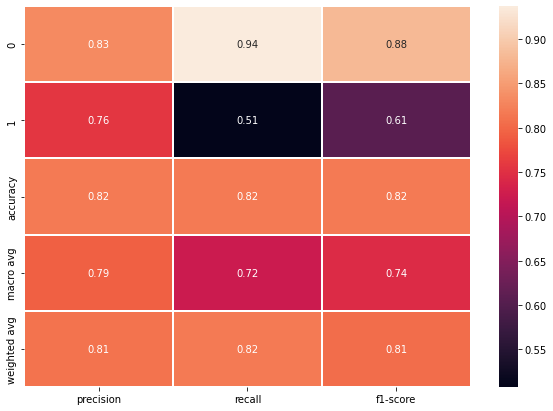

-------------------- Logistic Regression --------------------
Best Parameters: {'C': 1.0, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cg'}

Confusion Matrix


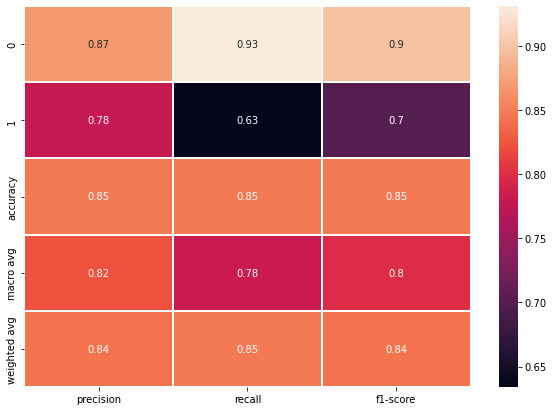

-------------------- Random Forest --------------------
Best Parameters: {'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}

Confusion Matrix


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

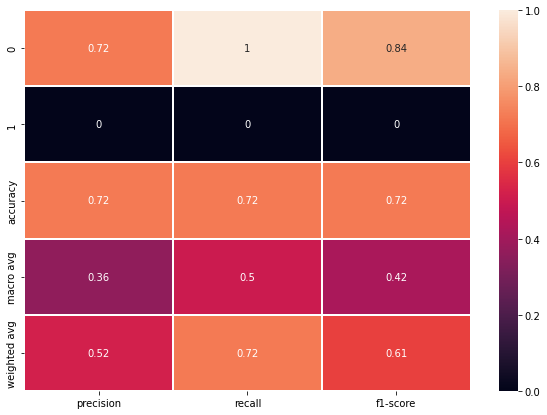

-------------------- Decision Tree --------------------
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 50}

Confusion Matrix


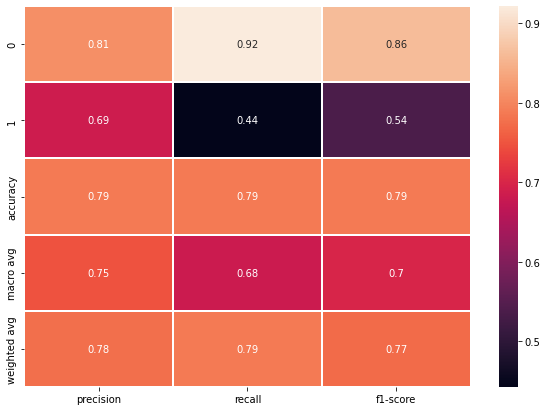

In [ ]:
# Model Predictions
model_predictions(nb_clf, nb_parameters, "Multinominal Naive Bayes")
model_predictions(lr_clf, lr_parameters, "Logistic Regression")
model_predictions(rf_clf, rf_parameters, "Random Forest")
model_predictions(dt_clf, dt_parameters, "Decision Tree")
plt.show()

-------------------- Random Forest --------------------
Best Parameters: {'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}

Confusion Matrix


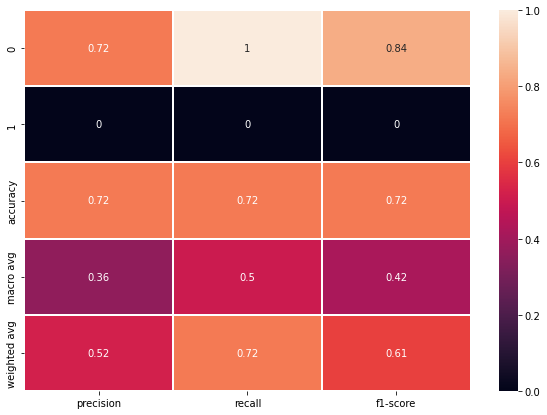

In [ ]:
model_predictions(rf_clf, rf_parameters, "Random Forest")
plt.show()

### Model Building with Hyperparameter Tunning for Balanced Dataset
* Here we are only using Randon Over Sampler(ROS) since the models perform better when data is balanced using this technique.
*This was observed in Phase 2 file when models were implemented using the default parameters

In [ ]:
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(x_train, y_train)

In [ ]:
print(f"Train_data Imbalanced label count:{Counter(y_train)}")
print(f"Train_data Balanced label count: {Counter(y_res)}")
print(f"Test_data Imbalanced label count{Counter(y_test)}")

Train_data Imbalanced label count:Counter({0: 25777, 1: 10241})
Train_data Balanced label count: Counter({0: 25777, 1: 25777})
Test_data Imbalanced label countCounter({0: 8668, 1: 3338})


In [ ]:
# Prediction Fuction
def model_predictions_bal(clf, parameters, clf_name):
    print("-"*20, clf_name, "-"*20 )
    clf_gs, clf_params = grid_search_fit(clf, parameters, 3, X_res, y_res)
    print(f"Best Parameters: {clf_params}")
    print()
    print("Classification Report")
    print(grid_predict(clf_gs, x_test, y_test))
    plt.show()


-------------------- Logistic Regression --------------------
Best Parameters: {'C': 100, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cg'}

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      8668
           1       0.63      0.70      0.66      3338

    accuracy                           0.80     12006
   macro avg       0.75      0.77      0.76     12006
weighted avg       0.81      0.80      0.80     12006



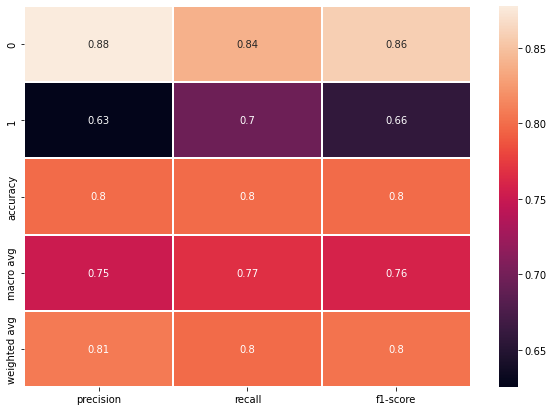

In [ ]:
#model_predictions_bal(nb_clf, nb_parameters, "Multinominal Naive Bayes")
model_predictions_bal(lr_clf, lr_parameters, "Logistic Regression")
#model_predictions_bal(rf_clf, rf_parameters, "Random Forest")
#model_predictions_bal(dt_clf, dt_parameters, "Decision Tree")